# Car Price Prediction

- This is not Classification Example this is Regression Example having no Label in the end of the dataset
### Work Flow
 ->Car Data -> Data Pre-Processing ->Data Analysis ->Training and Testing ->Model (linear and lasso Regression model) ->Trained Model ->New Data -> Model prediction on New Data

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [2]:
car_data=pd.read_csv('car_data.csv')

In [3]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
car_data.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [5]:
car_data.shape

(301, 9)

In [10]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
car_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [9]:
car_data['Owner'].value_counts()

0    290
1     10
3      1
Name: Owner, dtype: int64

In [11]:
car_data.Seller_Type.value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [12]:
car_data.Fuel_Type.value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [13]:
car_data.Transmission.value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [18]:
car_data.Year.value_counts()

2015    61
2016    50
2014    38
2017    35
2013    33
2012    23
2011    19
2010    15
2008     7
2009     6
2006     4
2005     4
2003     2
2007     2
2018     1
2004     1
Name: Year, dtype: int64

# Data Visualization and Analysis

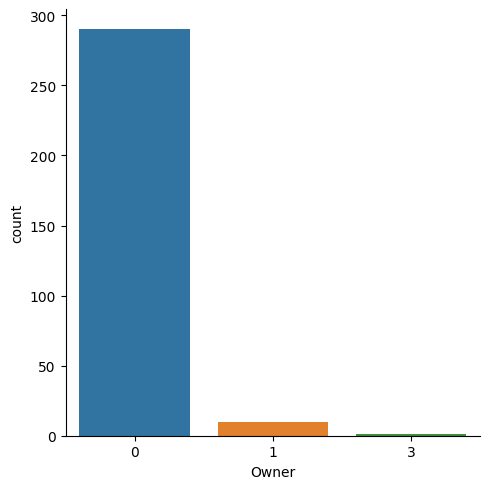

In [14]:
sns.catplot(car_data,x='Owner',kind='count')

<AxesSubplot: xlabel='Fuel_Type', ylabel='Owner'>

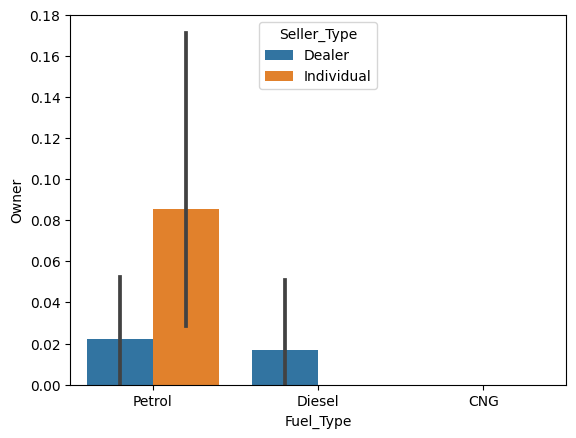

In [17]:
sns.barplot(car_data,x='Fuel_Type',y='Owner',hue='Seller_Type')

## Encoding the Categorical Data
-We change the string data value to integer data value

In [24]:
car_data=car_data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2},
                          'Seller_Type':{'Dealer':0,'Individual':1},
                          'Transmission':{'Manual':0,'Automatic':1}})

In [25]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [27]:
print(car_data.Fuel_Type.value_counts())
print(car_data.Seller_Type.value_counts())
print(car_data.Transmission.value_counts())

0    239
1     60
2      2
Name: Fuel_Type, dtype: int64
0    195
1    106
Name: Seller_Type, dtype: int64
0    261
1     40
Name: Transmission, dtype: int64


# Splitting Data 

In [33]:
X=car_data.drop(columns=['Car_Name','Selling_Price'],axis=1)
Y=car_data['Selling_Price']

In [34]:
X

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


In [35]:
Y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

# Splitting Data into Training and Testing

In [38]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [39]:
print(X.shape,X_train.shape,X_test.shape)

(301, 7) (240, 7) (61, 7)


# Model Training (Linear Regression)

In [40]:
Linear_model=LinearRegression()

### Prediction of training data

In [41]:
Linear_model.fit(X_train,Y_train)
X_train_Prediction=Linear_model.predict(X_train) 

#### X_train_Prediction contain the prediction value of X_train data

- As we know X_train_Prediction contain the prediction value of X_train data and the original value contain in Y_train, so lets compare them and find how accurate the prediction will come out

## to find accuracy in Regression we use 
- R square error
- mean absolute error
- root mean square error

In [42]:
# R square error

error_score=metrics.r2_score(Y_train,X_train_Prediction)

In [43]:
error_score  

0.8838169193709792

## Visualize the Actual prices and Prediction price

Text(0, 0.5, 'Predicted Price')

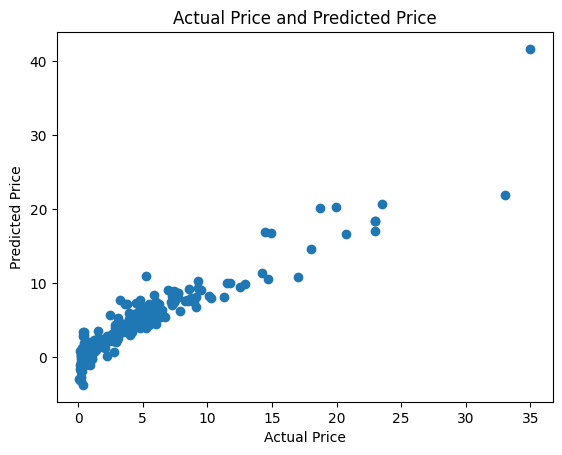

In [51]:
plt.scatter(Y_train,X_train_Prediction)
plt.title("Actual Price and Predicted Price")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")

# Prediction on Test Data

In [52]:
X_test_Prediction=Linear_model.predict(X_test)

# R square error to compare the Prediction

error_score=metrics.r2_score(Y_test,X_test_Prediction)

In [53]:
print(error_score)

0.8401532365378521


## Visualize the Actual and Predicted Test Data

Text(0, 0.5, 'Predicted Test')

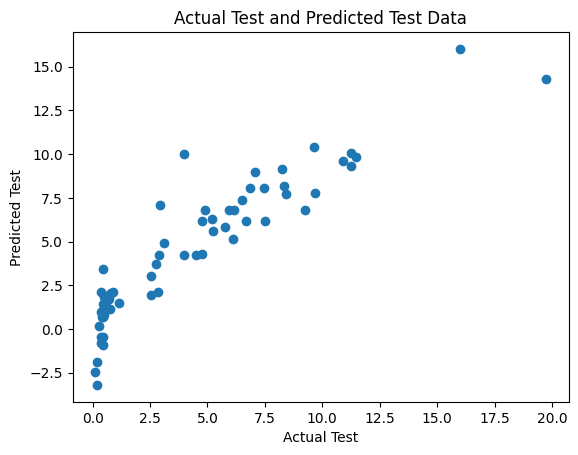

In [54]:
plt.scatter(Y_test,X_test_Prediction)
plt.title("Actual Test and Predicted Test Data")
plt.xlabel("Actual Test")
plt.ylabel("Predicted Test")

# Training Model(Lasso Regression)

In [55]:
lasso_model=Lasso()

In [56]:
lasso_model.fit(X_train,Y_train)

Lasso()

# Training Prediction

In [57]:
X_train_Prediction=lasso_model.predict(X_train)

In [59]:
# R square error for compare the prediction value and actual value

error_score=metrics.r2_score(Y_train,X_train_Prediction)

In [60]:
print(error_score)

0.843587395258283


## Visualize Training and Prediction Data

Text(0, 0.5, 'Prediction value')

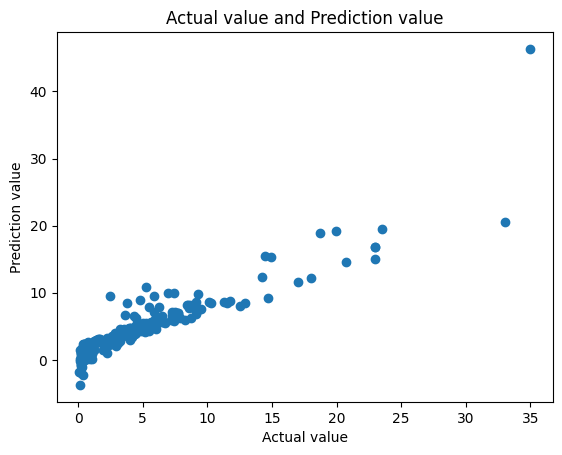

In [61]:
plt.scatter(Y_train,X_train_Prediction)
plt.title("Actual value and Prediction value")
plt.xlabel("Actual value")
plt.ylabel("Prediction value")

# Testing Prediction

In [62]:
X_test_prediction=lasso_model.predict(X_test)

In [63]:
error_score=metrics.r2_score(Y_test,X_test_prediction)

In [64]:
error_score

0.8497457570738539

# Visualize Testing and Prediction Value

Text(0, 0.5, 'Prediction value')

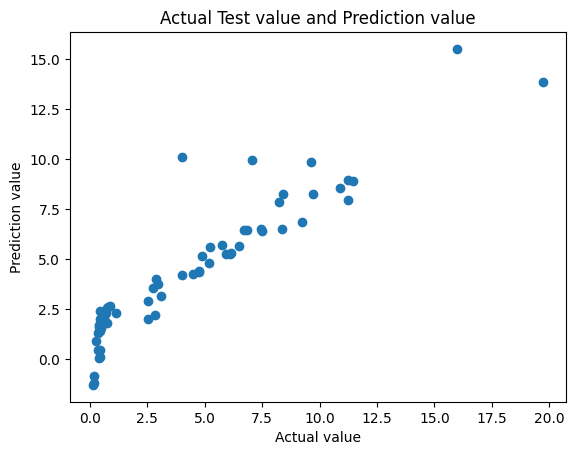

In [65]:
plt.scatter(Y_test,X_test_prediction)
plt.title("Actual Test value and Prediction value")
plt.xlabel("Actual value")
plt.ylabel("Prediction value")